In [173]:
import re
import codecs
import pandas as pd
from textblob import TextBlob
import json
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.options.display.float_format = '{:20,.2f}'.format
pd.options.display.max_columns = 100
pd.options.display.max_rows = 500

In [174]:

def make_df(filename):
    # make list of chapters
    book = make_file(filename)
    
    # turn book into dataframe
    book_df = pd.DataFrame(book)
    book_df.columns = ['chapter_text']
    
    # add column with chapter's POV character
    book_df['chapter_name'] = book_df['chapter_text'].apply(chap_char)
    
    # add column with book title
    title = book_df.ix[0, 1]
    book_df['book_title'] = title
    
    # drop first row with book basic info
    book_df.drop(0, inplace=True)
    
    # add column with chapter number
    book_df['chapter_num'] = book_df.index
    book_df = book_df[['book_title', 'chapter_num', 'chapter_name', 'chapter_text']]
    
    return book_df

    
def make_file(filename):
    # read in book text by line
    with codecs.open(filename, mode='r') as f:
        txt = f.read().splitlines()
    
    # concatinate lines in the same chapter
    book = []
    # initialize to false for first chapter
    end = False 
    
    for i in range(0, len(txt)):
        # remove page numbers and chapter headers
        txt[i] = re.sub('Page [0-9]*', '', txt[i])
        txt[i] = re.sub('Chapter [0-9]*', '', txt[i])
        
        # skip blank lines
        if not txt[i] or re.match("^ *$", txt[i]):
            continue
        
        # find chapter begining which start with character name capitalized
        elif re.match("^[ A-Z]*$", txt[i]):
            if end:
                # append previous chapter to list (false for first chapter)
                book.append(chapter) 
            # start new chapter
            chapter = txt[i]
            # set end to true for subsequent chapters after first chapter
            end = True
        
        # if not begining of chapter, add lines to chapter
        else:
            chapter = chapter + txt[i]
    book.append(chapter)
    return book


def chap_char(x):
    # Find character name in all caps
    name = re.findall(r'^[ A-Z]*', x)
    
    # clean name
    name = name[0]
    name = name[:-1]
    name = name.strip()
    if name[-2:] == ' A':
        name = name[:-2]
        name = name.strip()
    
    return name

In [175]:
file1 = "GOTbooks/001ssb.txt"
file2 = "GOTbooks/002ssb.txt"
file3 = "GOTbooks/003ssb.txt"
file4 = "GOTbooks/004ssb.txt"
file5 = "GOTbooks/005ssb.txt"

game_of_thrones = make_df(file1)
clash_of_kings = make_df(file2)
storm_of_swords = make_df(file3)
feast_for_crows = make_df(file4)
dance_with_dragons = make_df(file5)


In [176]:
book_names = [game_of_thrones, clash_of_kings, storm_of_swords, feast_for_crows, dance_with_dragons]
ice_and_fire = pd.concat(book_names)
ice_and_fire.reset_index(inplace=True, drop=True)

In [177]:
ice_and_fire.head()

,book_title,chapter_num,chapter_name,chapter_text
0,A GAME OF THRONES,1,PROLOGUE,"PROLOGUE ""We should start back,"" Gared urged a..."
1,A GAME OF THRONES,2,BRAN,"BRAN The morning had dawned clear and cold, wi..."
2,A GAME OF THRONES,3,CATELYN,CATELYN Catelyn had never liked this godswood....
3,A GAME OF THRONES,4,DAENERYS,DAENERYS Her brother held the gown up for her ...
4,A GAME OF THRONES,5,EDDARD,EDDARD The visitors poured through the castle ...


In [178]:
ice_and_fire.shape

(344, 4)

In [179]:
with open('GOTscrapy/got_wiki.json') as filename:
    json_data = json.load(filename)

df = pd.DataFrame(json_data)
df.head()

,book,chronology,pov,setting
0,A Game of Thrones,Prologue,Will,Haunted forest
1,A Game of Thrones,Bran I,Bran Stark,Winterfell
2,A Game of Thrones,Catelyn I,Catelyn Stark,Winterfell
3,A Game of Thrones,Daenerys I,Daenerys Targaryen,Pentos
4,A Game of Thrones,Eddard I,Eddard Stark,Winterfell


In [180]:
df.shape

(344, 4)

In [181]:
ice_and_fire = ice_and_fire.join(df)

In [182]:
ice_and_fire.drop(['book'], axis=1, inplace=True)
df_names = ['book_title', 'chapter_num', 'chapter_name', 'pov', 'chronology', 'setting', 'chapter_text']
ice_and_fire = ice_and_fire[df_names]

In [183]:
ice_and_fire.head()

,book_title,chapter_num,chapter_name,pov,chronology,setting,chapter_text
0,A GAME OF THRONES,1,PROLOGUE,Will,Prologue,Haunted forest,"PROLOGUE ""We should start back,"" Gared urged a..."
1,A GAME OF THRONES,2,BRAN,Bran Stark,Bran I,Winterfell,"BRAN The morning had dawned clear and cold, wi..."
2,A GAME OF THRONES,3,CATELYN,Catelyn Stark,Catelyn I,Winterfell,CATELYN Catelyn had never liked this godswood....
3,A GAME OF THRONES,4,DAENERYS,Daenerys Targaryen,Daenerys I,Pentos,DAENERYS Her brother held the gown up for her ...
4,A GAME OF THRONES,5,EDDARD,Eddard Stark,Eddard I,Winterfell,EDDARD The visitors poured through the castle ...


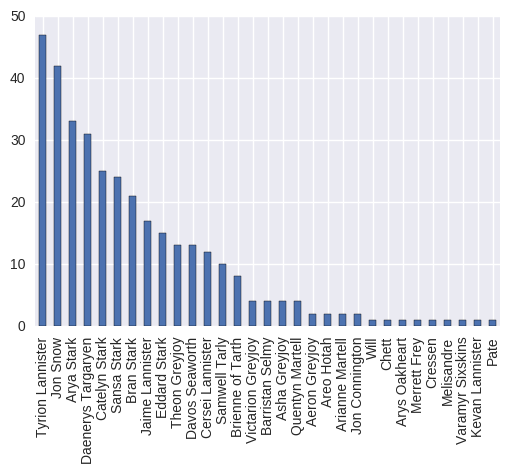

In [184]:
ice_and_fire.pov.value_counts().plot(kind='bar');

In [185]:
ice_and_fire['polarity'] = ice_and_fire['chapter_text'].apply(lambda x: TextBlob(x).sentiment[0])
ice_and_fire['subjectivity'] = ice_and_fire['chapter_text'].apply(lambda x: TextBlob(x).sentiment[1])

In [187]:
ice_and_fire

,book_title,chapter_num,chapter_name,pov,chronology,setting,chapter_text,polarity,subjectivity
0,A GAME OF THRONES,1,PROLOGUE,Will,Prologue,Haunted forest,"PROLOGUE ""We should start back,"" Gared urged a...",-0.03,0.47
1,A GAME OF THRONES,2,BRAN,Bran Stark,Bran I,Winterfell,"BRAN The morning had dawned clear and cold, wi...",0.01,0.49
2,A GAME OF THRONES,3,CATELYN,Catelyn Stark,Catelyn I,Winterfell,CATELYN Catelyn had never liked this godswood....,0.05,0.47
3,A GAME OF THRONES,4,DAENERYS,Daenerys Targaryen,Daenerys I,Pentos,DAENERYS Her brother held the gown up for her ...,0.07,0.46
4,A GAME OF THRONES,5,EDDARD,Eddard Stark,Eddard I,Winterfell,EDDARD The visitors poured through the castle ...,0.04,0.52
5,A GAME OF THRONES,6,JON,Jon Snow,Jon I,Winterfell,"JON There were times-not many, but a few-when ...",0.05,0.48
6,A GAME OF THRONES,7,CATELYN,Catelyn Stark,Catelyn II,Winterfell,CATELYN Of all the rooms in Winterfell's Great...,0.04,0.50
7,A GAME OF THRONES,8,ARYA,Arya Stark,Arya I,Winterfell,ARYA Arya's stitches were crooked again. She f...,0.08,0.48
8,A GAME OF THRONES,9,BRAN,Bran Stark,Bran II,Winterfell,BRAN The hunt left at dawn. The king wanted wi...,0.01,0.46
9,A GAME OF THRONES,10,TYRION,Tyrion Lannister,Tyrion I,Winterfell,TYRION Somewhere in the great stone maze of Wi...,0.02,0.49
